In [1]:
import os
from glob import glob
import pickle

import joblib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_dir = glob('../src/data/SeaFog/*.csv')

In [3]:
data_dir.sort()

In [4]:
data_dir

['../src/data/SeaFog/302_증산도.csv',
 '../src/data/SeaFog/771_불무기도.csv',
 '../src/data/SeaFog/772_장도.csv',
 '../src/data/SeaFog/789_목포구.csv',
 '../src/data/SeaFog/SF_0008_여수 해무관측소.csv']

In [5]:
col_list = ['지점 기온(°C)',
'수온(°C)',
'강수량 1분(mm)',
'풍속(m/s)',
'u',
'v',
"현지기압(hPa)",
'해면기압(hPa)',
'습도(%)',
'일사(MJ/m^2)',
'일조(Sec)',
'T',
'해기차(T-SST)',
'이슬점온도(°C)',
'기온',
'이슬점온도(T-Td)',
'수온',
'이슬점온도(°C)',
'vis']


In [6]:
col = ['기온(°C)',
 '수온(°C)',
 '풍속(m/s)',
 'u',
 'v',
 '습도(%)',
 '해기차(T-SST)',
 '이슬점온도(°C)',
 '기온-이슬점온도(T-Td)',
 '수온-이슬점온도(°C)',
 'vis']

In [7]:
new_col = ['t', 'st', 'ws', 'u', 'v', 'h', 'astd', 
          'dp', 't-dp', 'st-dp', 'vis']

In [8]:
temp_1 = []
temp_2 = []
target_col_name = []
fog_col = []

for ii, _dir in enumerate(data_dir):
    data = pd.read_csv(_dir, index_col=0, encoding='cp949')
    island_name = data['지점'][0]
    data = data[data.index >= '2019-12-14 09:00:00']
    data[f'{island_name}_Fog'] = 0
    data.drop('지점', axis=1, inplace=True)
    data.drop('해면기압(hPa)', axis=1, inplace=True)

    
    if ii < len(data_dir)-1:
        data.drop('일사(MJ/m^2)', axis=1, inplace=True)
        data.drop('일조(Sec)', axis=1, inplace=True)
        data.drop('1분 강수량(mm)', axis=1, inplace=True)
        data.drop('현지기압(hPa)', axis=1, inplace=True)
        data.drop('T', axis=1, inplace=True)
    
    col_name_change = {col[i]:str(island_name)+'_'+new_col[i] for i in range(len(new_col))}
    data.rename(columns=col_name_change, inplace=True)
    
    data.loc[data[f'{island_name}_vis'] <= 1000 , f'{island_name}_Fog'] = 1
    data.loc[data[f'{island_name}_vis'] >= 2000 , f'{island_name}_vis'] = 2000
    
    df_1 = data[data.index <= '2021-06-01 23:50:00']
    df_2 = data[data.index >= '2021-07-01 00:00:00']
    
    target_col_name.append(str(island_name)+'_vis')
    fog_col.append(str(island_name)+'_Fog')
        
    temp_1.append(df_1)
    temp_2.append(df_2)

In [9]:
dataframe_1 = pd.DataFrame()

for df in temp_1:
    dataframe_1 = pd.concat([dataframe_1, df], axis=1)
    
dataframe_2 = pd.DataFrame()

for df in temp_2:
    dataframe_2 = pd.concat([dataframe_2, df], axis=1)

In [10]:
dataframe_1.dropna(inplace=True)
dataframe_2.dropna(inplace=True)

In [11]:
dataframe_1.index = pd.to_datetime(dataframe_1.index)
dataframe_2.index = pd.to_datetime(dataframe_2.index)

In [12]:
df = pd.concat([dataframe_1, dataframe_2], axis=0)

In [13]:
df

,302_t,302_st,302_ws,302_u,302_v,302_h,302_astd,302_dp,302_t-dp,302_st-dp,...,SF_0008_ws,SF_0008_u,SF_0008_v,SF_0008_h,SF_0008_astd,SF_0008_dp,SF_0008_t-dp,SF_0008_st-dp,SF_0008_vis,SF_0008_Fog
time,,,,,,,,,,,,,,,,,,,,,
2019-12-14 09:10:00,7.67,10.70,4.240000,0.531895,4.198112,63.21,-3.03,0.316809,7.353191,10.383191,...,1.9125,-1.784218,0.154687,65.00,-2.950000,2.024695,6.925305,9.875305,2000.0,0
2019-12-14 09:20:00,7.72,10.62,4.300000,0.599620,4.235989,61.02,-2.90,-0.187520,7.907520,10.807520,...,1.6900,-1.590688,0.263196,62.10,-2.760000,1.489666,7.650334,10.410334,2000.0,0
2019-12-14 09:30:00,7.80,10.57,3.980000,1.161628,3.644537,60.19,-2.77,-0.320629,8.120629,10.890629,...,1.3000,0.007476,0.004024,61.75,-2.650000,1.509457,7.740543,10.390543,2000.0,0
2019-12-14 09:40:00,7.79,10.50,4.388889,0.645240,4.337860,61.24,-2.71,-0.061281,7.851281,10.561281,...,3.5100,1.809175,2.474179,60.20,-2.710000,1.053149,8.136851,10.846851,2000.0,0
2019-12-14 09:50:00,7.90,10.48,4.220000,0.792587,4.134146,61.47,-2.58,0.105694,7.794306,10.374306,...,4.4000,1.216700,4.005781,58.70,-2.900000,0.475382,8.524618,11.424618,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30 23:10:00,24.25,23.00,1.150000,0.502581,-0.958005,92.37,1.25,22.986038,1.263962,0.013962,...,0.8900,0.001973,-0.868320,100.00,1.270000,24.124400,-0.004400,-1.274400,2000.0,0
2022-06-30 23:20:00,24.12,23.00,0.440000,0.127986,-0.258915,93.02,1.12,22.970495,1.149505,0.029505,...,0.1800,-0.085532,-0.156948,100.00,1.339000,24.194400,-0.004400,-1.343400,2000.0,0
2022-06-30 23:30:00,24.19,23.00,0.980000,0.546869,-0.778959,92.75,1.19,22.993040,1.196960,0.006960,...,0.1500,-0.007961,-0.127845,100.00,1.358222,24.226622,-0.004400,-1.362622,2000.0,0


In [14]:
_col_names = df.columns

In [15]:
fog_col = [_col for _col in _col_names if 'Fog' in _col]
columns = [_col for _col in _col_names if _col not in fog_col]

_dataframe = df[columns]

In [17]:
fog_df = df[fog_col]

In [19]:
index_val = df.index

In [22]:
import sys

sys.path.append('../src')

In [23]:
from utils.scalers import Scaler

In [24]:
scaler = Scaler('std')

In [25]:
scaled_df = scaler.scale(_dataframe.to_numpy().T)

In [26]:
scaled_df.shape

(55, 96391)

In [34]:
len(scaler.x_shift)

55

In [27]:
dataframe = pd.DataFrame(scaled_df.T, columns=columns, index=index_val)

In [32]:
original = _dataframe.to_numpy().T
scaled = dataframe.to_numpy().T

inv_target = scaler.inv_scale(scaled)

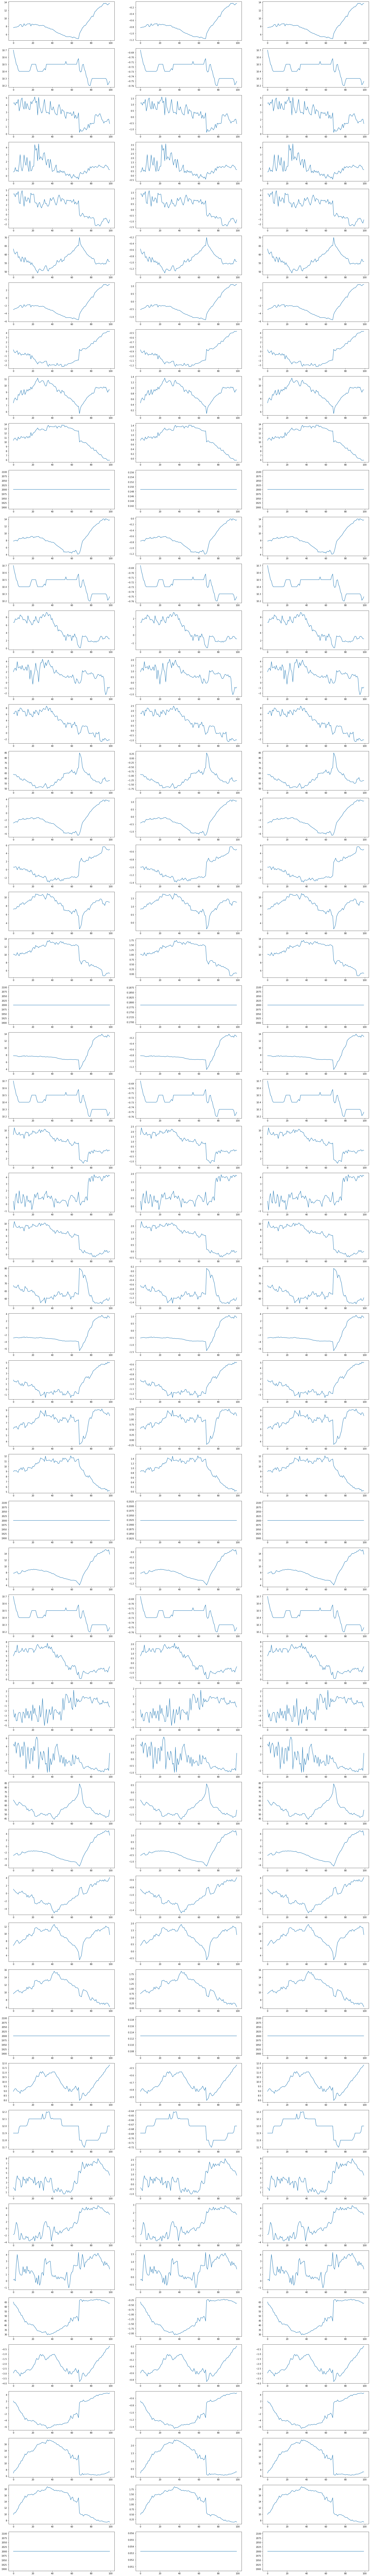

In [33]:
f, ax = plt.subplots(nrows=55, ncols=3, figsize=(3*10, 4*55))

for node in range(55):
    ax[node,0].plot(original[node][:100])
    ax[node,1].plot(scaled[node][:100])
    ax[node,2].plot(inv_target[node][:100])

In [ ]:
df.to_csv('./sea_fog_dataset.csv')

In [ ]:
num_timesteps_in = 60
num_timesteps_out = 6

indices = [
    (i, i + (num_timesteps_in + num_timesteps_out))
    for i in range(df.shape[0] - (num_timesteps_in + num_timesteps_out))
    if (df.index[i + (num_timesteps_in + num_timesteps_out)] - df.index[i]).seconds / 600 == num_timesteps_in + num_timesteps_out
]

In [ ]:
import random
import torch

In [ ]:
random.shuffle(indices)

In [ ]:
col_names = list(df.columns)
index_val = df.index

In [ ]:
fog_col = [_col for _col in col_names if 'Fog' in _col]

In [ ]:
columns = [_col for _col in col_names if _col not in fog_col]

In [ ]:
dataframe = df[columns]
fog_df = df[fog_col]

In [ ]:
import sys

sys.path.append('../src')

In [ ]:
features, target, anomaly = [], [], []

for i, j in indices:
    features.append(dataframe.iloc[i: i + num_timesteps_in].T.values)
    target.append(dataframe.iloc[i + num_timesteps_in: j].T.values)
    anomaly.append(fog_df.iloc[i + num_timesteps_in:j].T.values[:, 0])
    
#     temp = fog_df.iloc[i + num_timesteps_in:j].T.values
#     anomaly.append(np.array([1 if sum(_row) >= 1 else 0 for _row in temp]).T)

features = torch.FloatTensor(np.array(features))
targets = torch.FloatTensor(np.array(target))
anomaly_point = torch.Tensor(np.array(anomaly))

In [ ]:
total_samples = anomaly_point.shape[0]

nSamples = [[total_samples-int(num_samples), int(num_samples)] for num_samples in sum(anomaly_point)]

In [ ]:
nSamples

In [ ]:
normedWeights = [[1 - (x[0] / sum(x)), 1-(x[1] / sum(x))] for x in nSamples]

In [ ]:
normedWeights

In [ ]:
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

In [ ]:
_data = []

for batch in range(len(indices)):
    _data.append(Data(x=features[batch], y=targets[batch], 
                      anomaly=anomaly_point[batch], time_stamp=None))
    

In [ ]:
loader = DataLoader(_data, batch_size=64, shuffle=True, 
                    drop_last=True, pin_memory=True)

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [ ]:
a = Variable(torch.Tensor([0]), requires_grad=True)

In [ ]:
temp = torch.Tensor(128,2)

In [ ]:
node_list = [10, 21, 32, 43, 54]

In [ ]:
selected = [temp[node] for node in range(temp.shape[0]) if node in node_list]

In [ ]:
m = nn.Softmax(dim=-1)

In [ ]:
out = m(temp)

In [ ]:
out.shape

In [ ]:
classification_output = torch.zeros(size=(128, 
                                          len(node_list), 
                                          2))



In [ ]:
classification_output[:,0,:] = out

In [ ]:
classification_output.shape

In [ ]:
fnc = nn.CrossEntropyLoss()

In [ ]:
fnc(classification_output[:,0,:], torch.zeros(size=(128, 
                                          2))
)